In [151]:
import os
import pickle
import copy

import numpy as np
import matplotlib.pyplot as plt

### step 1. specifiy a setting

In [152]:
# p = '1.5'
# T = 2000
# d = 5
# noise_free = False

In [320]:
p = '1.5'
T = 1000
d = 5
noise_free = False

### step 2. get all result file (including all learning rate scale)

In [321]:
root_path = '../results'

In [322]:
# find all the directories with regarding the setting we set above
dirs = []
for dirt in os.listdir(root_path):
    splits = dirt.split('-')
    if ('p={}'.format(p) in dirt) and ('T={}'.format(T)==splits[2]) \
        and ('d={}'.format(d) == splits[1]) and ('noise_free={}'.format(noise_free) in dirt):
        dirs.append(dirt)

In [323]:
algos = {
    'True': {},
    'False': {}
}

for dirt in dirs:
    path = os.path.join(root_path, dirt)
    scale = dirt.split('-')[3].split('=')[1]
    test_flag = dirt.split('-')[5].split('=')[1]
    
    files = os.listdir(path)
    
    if len(files) == 0:
        continue
        
    for file in files:
        print('loading:', os.path.join(path, file))
        f = pickle.load(open(os.path.join(path, file), 'rb'))
        
        algo = file.split('.')[0]
        if algo not in algos[test_flag]:
            algos[test_flag][algo] = {scale: f}
        else:
            algos[test_flag][algo][scale] = f
            

loading: ../results/p=1.5-d=5-T=1000-scale=0.1-noise_free=False-test_flag=True/NoisySFW.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=1.0-noise_free=False-test_flag=True/OFW_ple2.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.02-noise_free=False-test_flag=False/NoisySFW.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.6-noise_free=False-test_flag=True/OFW_ple2.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.4-noise_free=False-test_flag=True/OFW_ple2.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=10000.0-noise_free=False-test_flag=False/Local_MD.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.01-noise_free=False-test_flag=True/NoisySFW.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=1.0-noise_free=False-test_flag=False/OFW_ple2.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.02-noise_free=False-test_flag=True/NoisySFW.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.6-noise_free=False-test_flag=False/OFW_ple2.pkl
loading: ../results/p=1.5-d=5-T=1000-scale=0.4-noise_free=False-test_

### step 3. select the best curves over different lr-scale for each algo

In [324]:
 def collect_result_by_algo(algo, test_flag):
    ### collect all risk/time for each lr-scale
    
    results = algos[test_flag][algo]
    
    risk_dict = {}
    subopt_dict = {}
    time_dict = {}
    baseline_dict = {}
    test_iter_dict = {}

    for scale in results.keys():
        res = results[scale]

        risks = []
        subopts = []
        times = []
        baselines = []
        test_iters = []

        for r in res:
            
            times.append(copy.copy(r['result']['time']))
            
            if test_flag == 'True':
                test_iters.append([v[0] for v in r['result']['record']])
                risks.append([v[1] for v in r['result']['record']])
                subopts.append([v[2] for v in r['result']['record']])
                baselines.append(r['result']['baseline'][0])

        # time starts from 0
        for i in range(len(times)):
            times[i][0] = 0

        if test_flag == 'True':
            
            # subopts starts from 1
            for i in range(len(subopts)):
                subopts[i] = [1] + subopts[i]

            # risk starts from baseline
            for i in range(len(risks)):
                risks[i] = [baselines[i]] + risks[i]
                
            # test iteration starts from 0
            for i in range(len(test_iters)):
                test_iters[i] = [0] + test_iters[i]

        test_iters = np.array(test_iters)
        risks = np.array(risks)
        subopts = np.array(subopts)
        times = np.array(times)
        baselines = np.array(baselines)

        test_iter_dict[scale] = test_iters
        risk_dict[scale] = copy.copy(risks)
        subopt_dict[scale] = copy.copy(subopts)
        time_dict[scale] = copy.copy(times)
        baseline_dict[scale] = copy.copy(baselines)

    return risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict

In [325]:
### plotting
def plot_single_algo(dicts, name, iter_scale=1):
    
    f = plt.figure(figsize=(8,6))

    scales = list(dicts.keys())
    scales = sorted(scales)
    
    for scale in scales:
        data = dicts[scale]

        t = data.shape[1]
        x = np.arange(t)
        x = x * iter_scale

        y = data.mean(axis=0)
        error = data.std(axis=0)

        plt.plot(x, y, label='lr-scale={:.2f}'.format(float(scale)))
        #plt.fill_between(x, y - error, y + error, alpha=0.2)
    
    plt.xlabel('#iteration', fontsize=25)
    plt.ylabel(name, fontsize=25)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

    setting = 'p={} d={} T={} noise_free={}'.format(p, d, T, noise_free)
    #plt.title('{}\n{}\nn_obs:{}'.format(setting, algo, data.shape[1]), fontsize=20)
    
    plt.xlim(0, x[-1])

    plt.grid()
    plt.legend(fontsize=15)
    plt.show()


    return f

#### NoisySFW

In [326]:
algo = 'NoisySFW'
risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict = collect_result_by_algo(algo, 'True')

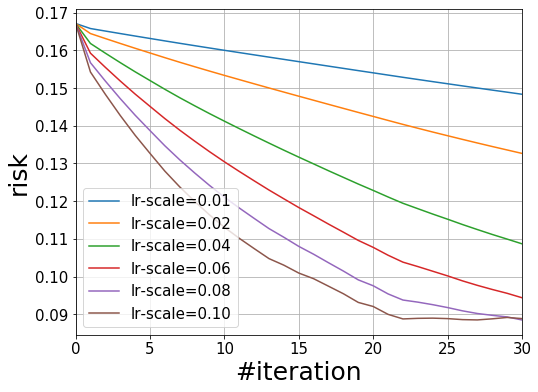

In [327]:
dicts = risk_dict
name = 'risk'
f = plot_single_algo(dicts, name)

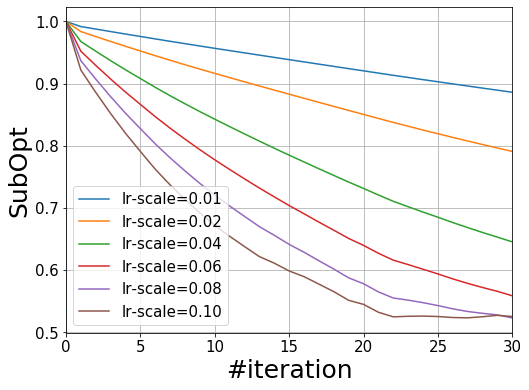

In [328]:
dicts = subopt_dict
name = 'SubOpt'
f = plot_single_algo(dicts, name)
f.savefig('./figure/subopt_{}_p{}_T{}_d{}.png'.format(algo, p, T, d), dpi=200)

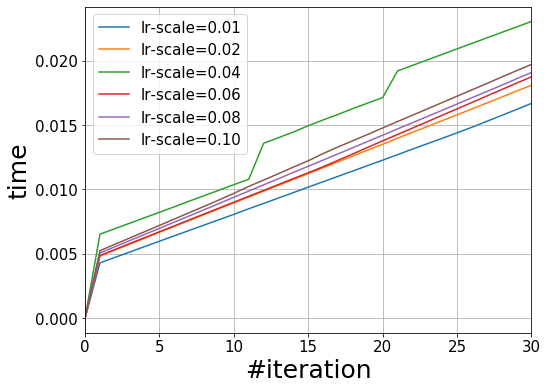

In [329]:
dicts = time_dict
name = 'time'
f = plot_single_algo(dicts, name)

#### OFW_ple2

In [330]:
algo = 'OFW_ple2'
risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict = collect_result_by_algo(algo, 'True')

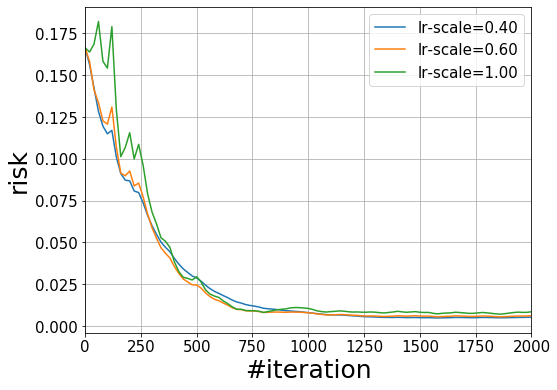

In [331]:
dicts = risk_dict
name = 'risk'
iter_scale = 20
f = plot_single_algo(dicts, name, iter_scale=iter_scale)

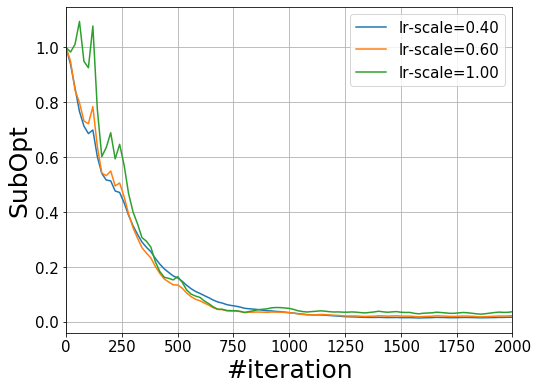

In [332]:
dicts = subopt_dict
name = 'SubOpt'
f = plot_single_algo(dicts, name, iter_scale=iter_scale)
f.savefig('./figure/subopt_{}_p{}_T{}_d{}.png'.format(algo, p, T, d), dpi=200)

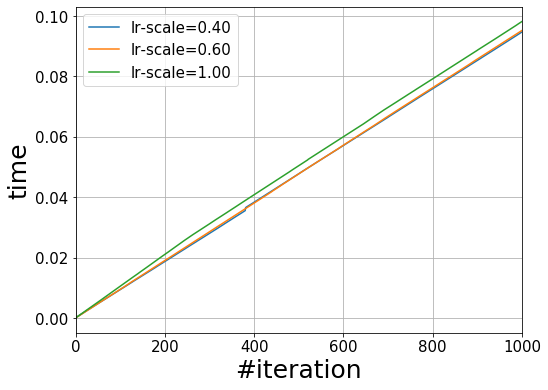

In [333]:
dicts = time_dict
name = 'time'
f = plot_single_algo(dicts, name, iter_scale=1)

In [334]:
time_dict['1.0']

array([[0.00000000e+00, 1.31130219e-04, 2.59876251e-04, ...,
        1.05365753e-01, 1.05460167e-01, 1.05566025e-01],
       [0.00000000e+00, 1.01327896e-04, 2.00510025e-04, ...,
        9.49416161e-02, 9.50348377e-02, 9.51395035e-02],
       [0.00000000e+00, 1.02043152e-04, 1.98841095e-04, ...,
        9.36801434e-02, 9.37728882e-02, 9.38777924e-02]])

### step 4. use time as x-axis to compare differnt algorithms

For risk or subopt, we need to use the data with test_flag=True

For time, we need to use the data with test_flag=False

In [335]:
best_setting = {
    'OFW_ple2': '1.0',
    'NoisySFW': '0.1',
}

target = 'SubOpt' # subopt or risk

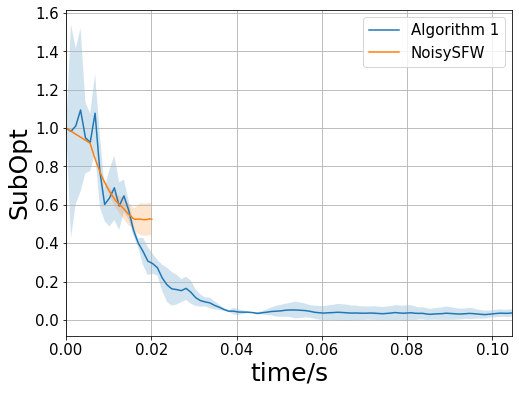

In [336]:
f = plt.figure(figsize=(8,6))


max_time = -1
for algo in best_setting:
    
    scale = best_setting[algo]
    
    risk_dict, subopt_dict, _, baseline_dict, test_iter_dict = collect_result_by_algo(algo, 'True')
    _, _, time_dict, _, _ = collect_result_by_algo(algo, 'False')
    
    test_iters = test_iter_dict[scale]
    test_iter = test_iters[0]
    
    risks = risk_dict[scale]
    subopts = subopt_dict[scale]
    times = time_dict[scale]
    baseline = baseline_dict[scale]
    
    if target == 'SubOpt':
        data = subopts
        
    elif target == 'risk':
        data = risks
    
    x = times.mean(axis=0)[test_iter]
    y = data.mean(axis=0)
    error = data.std(axis=0)
    
    if algo.split('_')[0] == 'OFW':
        plt.plot(x, y, label='Algorithm 1')
    else:
        plt.plot(x, y, label=algo.split('_')[0])
    plt.fill_between(x, y-error, y+error, alpha=0.2)
    
    if x[-1] > max_time:
        max_time = x[-1]
        
plt.xlim(0, max_time)

plt.xlabel('time/s', fontsize=25)
plt.ylabel(target, fontsize=25)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

setting = 'p={} d={} T={} noise_free={}'.format(p, d, T, noise_free)
#plt.title('{}'.format(setting), fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()

In [337]:
f.savefig('./figure/subopt_combine_p{}_T{}_d{}.png'.format(p, T, d), dpi=200)

### step 5. summarize the table for all the experiments results

In [93]:
import pandas as pd
import glob
import _pickle as cPickle
import warnings
warnings.filterwarnings("ignore")

In [94]:
def paras(x):
    return x.split('=')[-1]

root_path = '../results/*/*.pkl'
df = pd.DataFrame(columns = ['T', 'd', 'p', 'algo', 'scale', 'noise_free', 'test_flag', 'risk', 'subopt', 'time'])
for item in glob.glob(root_path):
    setting, algo = item.split('/')[-2], item.split('/')[-1]
    p, d, T, scale, noise_free, test_flag = setting.split('-')
    
    with open(item, "rb")  as input_file:
        dict_list = cPickle.load(input_file)
        if dict_list[0]['algo']['test_flag']==True:
            risk_mean = np.mean([logger_dict['result']['record'][-1][1] for logger_dict in dict_list])
            risk_std = np.std([logger_dict['result']['record'][-1][1] for logger_dict in dict_list])
            subopt = np.mean([logger_dict['result']['record'][-1][2] for logger_dict in dict_list])
            time_mean, time_std = -1, -1
        else:
            time_mean = np.mean([logger_dict['result']['time'][-1] for logger_dict in dict_list])
            time_std = np.std([logger_dict['result']['time'][-1] for logger_dict in dict_list])
            risk_mean, risk_std, subopt = -1, -1, -1

        df = df.append(
        {"T": paras(T),
         "d": paras(d),
         "p": paras(p),
         'algo': algo[:-4],
         "scale": paras(scale),
         "noise_free": paras(noise_free),
         "test_flag": paras(test_flag),
         "risk": risk_mean,
         "subopt": subopt,
         "time": time_mean
         }, ignore_index=True)
df = df.replace(-1, 10000)

KeyboardInterrupt: 

In [ ]:
df_groupby = df.groupby(by=['T','d','p', 'algo', 'noise_free']).agg({'risk': ['min'], 'subopt': 'min', 'time': 'min'})
df_noisefree = df_groupby.loc[(slice(None), slice(None), slice(None), slice(None), ["True"]), :]
df_noisy = df_groupby.loc[(slice(None), slice(None), slice(None), slice(None), ["False"]), :]

In [427]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df_noisy)

                                        risk        subopt          time
                                         min           min           min
T     d  p   algo     noise_free                                        
100   10 inf NoisySGD False         0.154773      0.992676  10000.000000
      20 inf NoisySGD False         0.081104      1.003067  10000.000000
      5  inf NoisySGD False         0.246933      0.823963  10000.000000
      50 inf NoisySGD False         0.034111      1.008249  10000.000000
1000  10 1.5 Local_MD False       552.497717   7128.479945     57.856086
             NoisySFW False         0.077124      0.952700      0.018066
             OFW_ple2 False         0.018310      0.201307      0.101776
         inf NoisySGD False         0.094843      0.608184     55.220978
             OFW_pge2 False         0.091541      0.582467      0.075061
      20 1.5 Local_MD False       575.789389  10000.000000    162.008653
             NoisySFW False         0.041356      1

In [428]:
df_groupby

risk    subopt          time
                                      min       min           min
T    d  p   algo     noise_free                                  
100  10 inf NoisySGD False       0.154773  0.992676  10000.000000
                     True        0.117497  0.749138  10000.000000
     20 inf NoisySGD False       0.081104  1.003067  10000.000000
                     True        0.075341  0.929182  10000.000000
     5  inf NoisySGD False       0.246933  0.823963  10000.000000
...                                   ...       ...           ...
5000 50 1.5 OFW_ple2 True        0.002526  0.003258      0.443538
        inf NoisySGD False       0.033078  0.992132    784.802573
                     True        0.030725  0.916412    674.825871
            OFW_pge2 False       0.034365  1.034127      0.395768
                     True        0.002836  0.011587      0.349586

[168 rows x 3 columns]

### split result

In [429]:
df_noise_test = df[(df.noise_free=='False') & (df.test_flag=='True')].copy()
df_noise_test = df_noise_test.drop(['noise_free', 'test_flag'], axis=1)

df_noise_test = df_noise_test.sort_values('subopt')
df_noise_test = df_noise_test.groupby(['T','d','p', 'algo']).head(1)

In [430]:
df_noise_test

,T,d,p,algo,scale,risk,subopt,time
106,10000,5,1.5,OFW_ple2,0.4,0.002554,0.000318,10000.0
1468,5000,5,1.5,OFW_ple2,0.4,0.002583,0.000702,10000.0
677,2000,5,1.5,OFW_ple2,0.4,0.002850,0.002350,10000.0
373,10000,5,inf,OFW_pge2,0.6,0.003368,0.002926,10000.0
296,10000,10,1.5,OFW_ple2,0.4,0.002816,0.004650,10000.0
...,...,...,...,...,...,...,...,...
1238,1000,10,1.5,Local_MD,100.0,552.497717,7128.479945,10000.0
580,1000,20,1.5,Local_MD,100.0,575.789389,15319.352694,10000.0
573,2000,20,1.5,Local_MD,100.0,592.345300,15570.292109,10000.0
1154,2000,50,1.5,Local_MD,100.0,251.476885,17675.230426,10000.0


### p = inf

In [431]:
df_noise_test_inf = df_noise_test[df_noise_test.p=='inf']
df_noise_test_inf['T'] = df_noise_test_inf['T'].astype(int)
df_noise_test_inf['d'] = df_noise_test_inf['d'].astype(int)

df_noise_test_inf = df_noise_test_inf.sort_values(['T', 'd', 'p', 'algo']).reset_index(drop=True)

In [432]:
df_noise_test_inf

,T,d,p,algo,scale,risk,subopt,time
0,100,5,inf,NoisySGD,0.8,0.246933,0.823963,10000.0
1,100,10,inf,NoisySGD,0.1,0.154773,0.992676,10000.0
2,100,20,inf,NoisySGD,0.1,0.081104,1.003067,10000.0
3,100,50,inf,NoisySGD,0.1,0.034111,1.008249,10000.0
4,200,5,inf,NoisySGD,1.0,0.213826,0.715121,10000.0
5,200,10,inf,NoisySGD,0.4,0.151139,0.967725,10000.0
6,200,20,inf,NoisySGD,0.1,0.081073,0.998927,10000.0
7,200,50,inf,NoisySGD,0.1,0.034153,1.006784,10000.0
8,500,5,inf,NoisySGD,2.0,0.077049,0.254481,10000.0
9,500,10,inf,NoisySGD,2.0,0.119282,0.772243,10000.0


In [433]:
df_noise_test_inf[df_noise_test_inf.algo=='OFW_pge2']

,T,d,p,algo,scale,risk,subopt,time
13,1000,5,inf,OFW_pge2,1.0,0.035697,0.112098,10000.0
15,1000,10,inf,OFW_pge2,1.0,0.091541,0.582467,10000.0
17,1000,20,inf,OFW_pge2,0.6,0.076566,0.981979,10000.0
19,1000,50,inf,OFW_pge2,0.6,0.040229,1.228886,10000.0
21,2000,5,inf,OFW_pge2,0.7,0.015172,0.043169,10000.0
23,2000,10,inf,OFW_pge2,1.0,0.058159,0.364402,10000.0
25,2000,20,inf,OFW_pge2,1.0,0.066990,0.819945,10000.0
27,2000,50,inf,OFW_pge2,0.6,0.035321,1.107576,10000.0
29,5000,5,inf,OFW_pge2,0.8,0.006666,0.014501,10000.0
31,5000,10,inf,OFW_pge2,1.0,0.022013,0.124745,10000.0


In [434]:
df_noise_test_inf[df_noise_test_inf.algo=='NoisySGD']

,T,d,p,algo,scale,risk,subopt,time
0,100,5,inf,NoisySGD,0.8,0.246933,0.823963,10000.0
1,100,10,inf,NoisySGD,0.1,0.154773,0.992676,10000.0
2,100,20,inf,NoisySGD,0.1,0.081104,1.003067,10000.0
3,100,50,inf,NoisySGD,0.1,0.034111,1.008249,10000.0
4,200,5,inf,NoisySGD,1.0,0.213826,0.715121,10000.0
5,200,10,inf,NoisySGD,0.4,0.151139,0.967725,10000.0
6,200,20,inf,NoisySGD,0.1,0.081073,0.998927,10000.0
7,200,50,inf,NoisySGD,0.1,0.034153,1.006784,10000.0
8,500,5,inf,NoisySGD,2.0,0.077049,0.254481,10000.0
9,500,10,inf,NoisySGD,2.0,0.119282,0.772243,10000.0


### p=1.5

In [245]:
df_noise_test_finite = df_noise_test[df_noise_test.p=='1.5']
df_noise_test_finite['T'] = df_noise_test_finite['T'].astype(int)
df_noise_test_finite['d'] = df_noise_test_finite['d'].astype(int)

df_noise_test_finite = df_noise_test_finite.sort_values(['T', 'd', 'p', 'algo'])

In [246]:
df_noise_test_finite[(df_noise_test_finite.algo=='NoisySFW') & 
                     (df_noise_test_finite.d==10)]

,T,d,p,algo,scale,risk,subopt,time
854,1000,10,1.5,NoisySFW,0.02,0.074655,0.925518,10000.0
680,2000,10,1.5,NoisySFW,0.04,0.069005,0.868729,10000.0
844,5000,10,1.5,NoisySFW,0.04,0.065677,0.815935,10000.0
1458,10000,10,1.5,NoisySFW,0.04,0.067132,0.847543,10000.0


In [247]:
df_noise_test_finite[(df_noise_test_finite.algo=='OFW_ple2') & 
                     (df_noise_test_finite.d==10)]

,T,d,p,algo,scale,risk,subopt,time
513,1000,10,1.5,OFW_ple2,0.6,0.018310,0.201307,10000.0
504,2000,10,1.5,OFW_ple2,1.0,0.007040,0.059473,10000.0
239,5000,10,1.5,OFW_ple2,0.6,0.003762,0.016346,10000.0
296,10000,10,1.5,OFW_ple2,0.4,0.002816,0.004650,10000.0
